# Fundamentos de Programación (Python)

**Bootcamp IA**

**Actividad Semana 1**

*Por: Óscar Emilio Mora Navarro*


Buenas noches. La mejor solución es:



,Proyecto,Año 1,Año 2,Año 3,Retorno,Realizar
0,1,5,1,8,20,Sí
1,2,4,7,10,40,Sí
2,3,3,9,2,20,Sí
3,4,7,4,1,15,Sí
4,5,8,6,10,30,No



Beneficio: $ 95



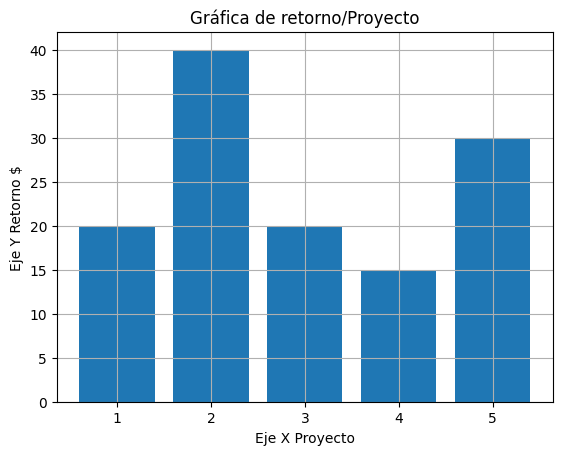

In [1]:
# Programación Lineal Entera (PLE) con vuelta atrás (backtracking)
#
# Selecciona un conjunto de proyectos que maximiza el retorno total, sujeto a
# las restriccione presupuestarias
#
#		Z = Máx 20 X1  + 40 X2 + 20 X3 + 15 X4  + 30 X5
#
#		Restricciones
#							5X1  +   4X2 +  3X3 +  7X4 +   8X5 ≤ 25 (P)
#							  X1  +   7X2 +  9X3 +  4X4 +   6X5 ≤ 25 (P)
#							8X1  +  10X2 +  2X3 +   X4 +  10X5 ≤ 25 (P)
#
#					    			    Xj  = 0,1 (j = 1, …, 5)

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from pytz import timezone


# Create a dataset
value_p_list = [1,  2, 3, 4, 5]
value_1_list = [5,  4, 3, 7, 8]     # [Gastos primer año $]
value_2_list = [1,  7, 9, 4, 6]     # [Gastos segundo año $]
value_3_list = [8, 10, 2, 1, 10]    # [Gastos tercer año $]
value_r_list = [20, 40, 20, 15, 30] # [Retorno esperado en $]

def backtracking(variables, rango_variables, optimo, profundidad):
  min=rango_variables[profundidad][0]
  max=rango_variables[profundidad][4]
  for v in range(min, max):
    variables[profundidad]=v
    if profundidad < len(variables)-1:
      # Es completable si no incumple ningúna restricción
      if es_completable(variables):
        optimo = backtracking(variables[:], rango_variables, optimo, profundidad+1)
    else:
      # estamos en una hoja. Comprobamos solucion.
      sol=evalua_solucion(variables)
      if sol>evalua_solucion(optimo) and es_completable(variables):
        optimo = (variables[0], variables[1], variables[2], variables[3], variables[4])

  return optimo

def evalua_solucion(variables):
  x1=variables[0]
  x2=variables[1]
  x3=variables[2]
  x4=variables[3]
  x5=variables[4]
  val = (20)*x1+(40)*x2+(20)*x3+(15)*x4+(30)*x5
  return val

def es_completable(variables):
  x1=variables[0]
  x2=variables[1]
  x3=variables[2]
  x4=variables[3]
  x5=variables[4]
  val1=5* x1+ 4*x2+ 3*x3+ 7*x4+ 8*x5
  val2=x1+ 7*x2+ 9*x3+ 4*x4+ 6*x5
  val3=8*x1+ 10*x2+ 2*x3+ x4+ 10*x5
  val4=x1
  val5=x2
  val6=x3
  val7=x4
  val8=x5
  if val1<=25 and val2<=25 and val3<=25 and val4<=1 and val5<=1 and val6<=1 and val7<=1 and val8<=1:
    return True
  else:
    return False

# "__main__":

#saluda dependiendo de la hora (formato militar:0-23 horas):
hora_1 = datetime.datetime.now(timezone('UTC'))
hora_actual = hora_1.astimezone(timezone('America/Bogota'))
hora=hora_actual.hour
#print("la hora es")
#print(hora)
print()
if 0<=hora<=12:
  print("\033[0;30m"+ 'Buenos días. La mejor solución es:')
elif 12<hora<=18:
  print("\033[0;30m" + 'Buenas tardes. La mejor solución es:')
else:
   print("\033[0;30m" + 'Buenas noches. La mejor solución es:')

# valores de las variables x1 x2 x3 x4 y x5
variables=[0,0,0,0,0]
# rangos de las variables x1 x2 x3 x4 y x5
rango_variables=[(0,0,0,0,2),(0,0,0,0,2),(0,0,0,0,2),(0,0,0,0,2),(0,0,0,0,2)]


# mejor solución encontrada
optimo=(0,0,0,0,0)
sol=backtracking(variables[:], rango_variables, optimo, 0)

#convesión sol a acción
min=0
max=5
acción=["","","","",""]
for x in range(min, max):
    if sol[x]==1:
        acción[x]="Sí"
    else:
        acción[x]="No"

#acción=["","","","",""]
#for sol in sol:
#    if sol==1:
#       acción="Sí"
#    else:
#       acción="No"

# Let´s use a dictionary ({key:value})
# with the format {"str":list}
data_dict = {"Proyecto":value_p_list,
             "Año 1":value_1_list,
             "Año 2":value_2_list,
             "Año 3":value_3_list,
             "Retorno":value_r_list,
             "Realizar":acción} #,

# Turn a dictionary into a dataframe
df = pd.DataFrame(data_dict)

# Definir el estilo para agregar un marco alrededor de la tabla
styled_df = df.style.set_table_styles([{
    'selector': 'table',
    'props': [('border', '2px solid black')]
}])

# Mostrar el DataFrame con el estilo aplicado
print()
display(styled_df)

# imprime el beneficio
print()
#print(df)
print ("\033[1;36m"+ "Beneficio: $ "+ "\033[1;30m" + str(evalua_solucion(sol)))
print ("\033[0;30m")
df

# Generación de gráfica
# Datos
x = df['Proyecto']
y = df['Retorno']
etiquetas = df['Proyecto']

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y, tick_label = etiquetas)
# plt.show()

#Etiquetas y leyenda de la gráfica
plt.xlabel('Eje X Proyecto')
plt.ylabel('Eje Y Retorno $')
plt.title("Gráfica de retorno/Proyecto")
#plt.legend()
plt.grid()
plt.show()
plt.savefig('grafica_retorno.png')
plt.close()

In [2]:
df

,Proyecto,Año 1,Año 2,Año 3,Retorno,Realizar
0,1,5,1,8,20,Sí
1,2,4,7,10,40,Sí
2,3,3,9,2,20,Sí
3,4,7,4,1,15,Sí
4,5,8,6,10,30,No


In [3]:
df

,Proyecto,Año 1,Año 2,Año 3,Retorno,Realizar
0,1,5,1,8,20,Sí
1,2,4,7,10,40,Sí
2,3,3,9,2,20,Sí
3,4,7,4,1,15,Sí
4,5,8,6,10,30,No
